In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base_path = "/home/jinjinjara1022/"

weather_forecast_data_1 = pd.read_csv(base_path + "OBIC/data/기상예측데이터_1.csv")
weather_forecast_data_2 = pd.read_csv(base_path + "OBIC/data/기상예측데이터_2.csv")  

weather_observed_data_1 = pd.read_csv(base_path + "OBIC/data/기상실측데이터_1.csv")
weather_observed_data_2 = pd.read_csv(base_path + "OBIC/data/기상실측데이터_2.csv")  
  
jeju_power_market_day_ahead = pd.read_csv(base_path + "OBIC/data/제주전력시장_시장전기가격_하루전가격.csv")
jeju_power_market_real_time = pd.read_csv(base_path + "OBIC/data/제주전력시장_시장전기가격_실시간가격.csv")

jeju_power_market_status = pd.read_csv(base_path + "OBIC/data/제주전력시장_현황데이터.csv")

In [3]:
jeju_power_market_status

,ts,공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW)
0,1704034800,1298000.0,769000.0,0.0,125426.0,133103.0,529000.0,323000.0
1,1704035100,1299000.0,761000.0,0.0,130393.0,137867.0,538000.0,339000.0
2,1704035400,1290000.0,755000.0,0.0,120691.0,128133.0,534000.0,335000.0
3,1704035700,1277000.0,756000.0,0.0,107771.0,115519.0,521000.0,325000.0
4,1704036000,1269000.0,753000.0,0.0,99264.4,107153.0,515000.0,318000.0
...,...,...,...,...,...,...,...,...
84075,1729607700,1254000.0,624000.0,0.0,247628.0,256210.0,625000.0,277000.0
84076,1729608000,1248000.0,618000.0,0.0,246598.0,255217.0,627000.0,277000.0
84077,1729608300,1255000.0,621000.0,0.0,251494.0,260161.0,630000.0,281000.0
84078,1729608600,1259000.0,612000.0,0.0,252912.0,261535.0,642000.0,290000.0


In [4]:
df = pd.merge(jeju_power_market_day_ahead, jeju_power_market_status, on='ts')

In [5]:
df.columns

Index(['ts', '하루전가격(원/kWh)', '공급능력(kW)', '현재 수요(kW)', '태양광 발전량kW)',
       '풍력 발전량(kW)', '신재생 발전량 총합(kW)', '공급 예비력(kW)', '운영 예비력(kW)'],
      dtype='object')

In [6]:
df['hour'] = pd.to_datetime(df['ts'], unit='s').dt.hour

In [7]:
df['sin_hour'] = np.sin(2 * np.pi * df['hour'] / 24)
df['cos_hour'] = np.cos(2 * np.pi * df['hour'] / 24)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5607 entries, 0 to 5606
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ts              5607 non-null   int64  
 1   하루전가격(원/kWh)    5607 non-null   float64
 2   공급능력(kW)        5607 non-null   float64
 3   현재 수요(kW)       5607 non-null   float64
 4   태양광 발전량kW)      5607 non-null   float64
 5   풍력 발전량(kW)      5607 non-null   float64
 6   신재생 발전량 총합(kW)  5607 non-null   float64
 7   공급 예비력(kW)      5607 non-null   float64
 8   운영 예비력(kW)      5607 non-null   float64
 9   hour            5607 non-null   int32  
 10  sin_hour        5607 non-null   float64
 11  cos_hour        5607 non-null   float64
dtypes: float64(10), int32(1), int64(1)
memory usage: 503.9 KB


In [9]:
y = df['하루전가격(원/kWh)']
x = df.drop(['하루전가격(원/kWh)', 'ts', 'hour'], axis=1)
#x = df[['현재 수요(kW)', '공급능력(kW)']]

In [10]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5607 entries, 0 to 5606
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   공급능력(kW)        5607 non-null   float64
 1   현재 수요(kW)       5607 non-null   float64
 2   태양광 발전량kW)      5607 non-null   float64
 3   풍력 발전량(kW)      5607 non-null   float64
 4   신재생 발전량 총합(kW)  5607 non-null   float64
 5   공급 예비력(kW)      5607 non-null   float64
 6   운영 예비력(kW)      5607 non-null   float64
 7   sin_hour        5607 non-null   float64
 8   cos_hour        5607 non-null   float64
dtypes: float64(9)
memory usage: 394.4 KB


In [11]:
from sktime.forecasting.model_selection import temporal_train_test_split

y_train, y_valid, x_train, x_valid = temporal_train_test_split(y = y, X = x, test_size = int(len(y) * 0.1))
print('train data shape\nx:{}, y:{}'.format(x_train.shape, y_train.shape))

train data shape
x:(5047, 9), y:(5047,)


/home/jinjinjara1022/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jinjinjara1022/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47336 (\N{HANGUL SYLLABLE RU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jinjinjara1022/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jinjinjara1022/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jinjinjara1022/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current fon

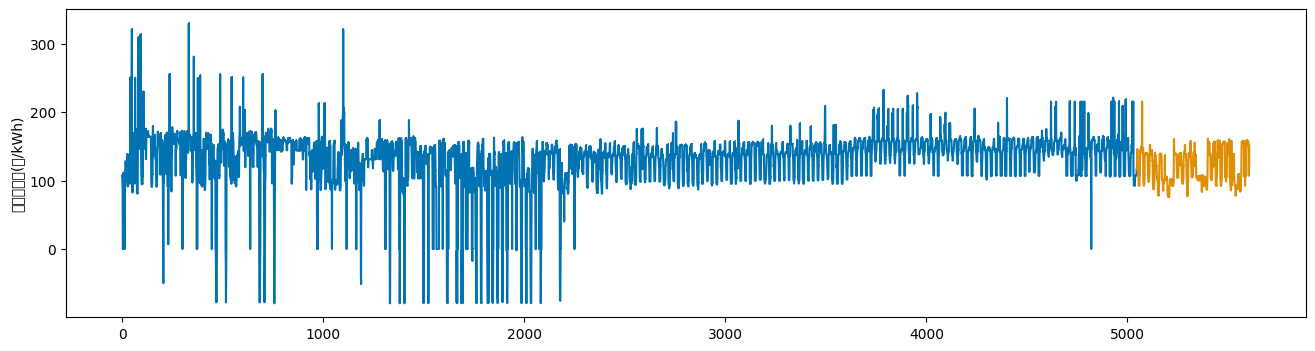

In [12]:
from sktime.utils.plotting import plot_series

plot_series(y_train, y_valid, markers=[',' , ','])
plt.show()

In [13]:
from xgboost import XGBRegressor

# XGBRegressor 모델 생성 (GPU 사용)
xgb_reg = XGBRegressor(
    n_estimators=500, 
    learning_rate=0.01,      # 학습률
    min_child_weight=0.5,      # 최소 가중치
    max_depth=4,             # 최대 깊이
    colsample_bytree=0.8,    # 컬럼 샘플링 비율
    subsample=0.8,           # 데이터 샘플링 비율
    tree_method='hist',      # 'hist' 사용
    device='cuda',           # GPU 사용 설정
    seed=0,
    early_stopping_rounds = 500
)

xgb_reg.fit(
    x_train, y_train, 
    eval_set=[(x_train, y_train), (x_valid, y_valid)], 
    verbose=False
)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device='cuda', early_stopping_rounds=500,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=0.5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [14]:
pred = xgb_reg.predict(x_valid)
pred = pd.Series(pred)
pred.index = np.arange(y_valid.index[0], y_valid.index[-1]+1)

/home/jinjinjara1022/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:31:52] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


SMAPE : 6.5382782679459


/home/jinjinjara1022/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  func(*args, **kwargs)
/home/jinjinjara1022/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47336 (\N{HANGUL SYLLABLE RU}) missing from current font.
  func(*args, **kwargs)
/home/jinjinjara1022/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
/home/jinjinjara1022/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
/home/jinjinjara1022/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  func(*args, **kwargs)
/home/jinjinjara1022/.local/lib/python3.10/site-packages/IPython/core/

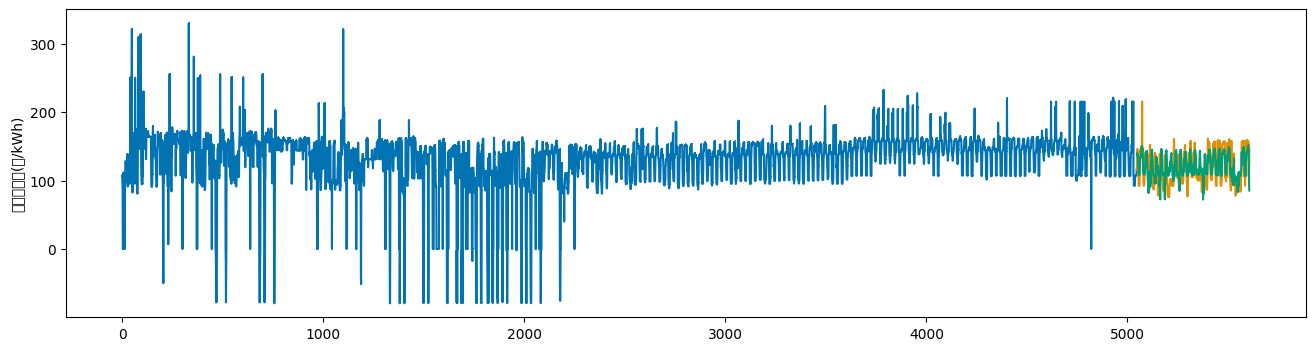

In [15]:
# Define SMAPE loss function
def SMAPE(true, pred):
    return np.mean((np.abs(true-pred))/(np.abs(true) + np.abs(pred))) * 100
plot_series(y_train, y_valid, pd.Series(pred), markers=[',' , ',', ','])

print('SMAPE : {}'.format(SMAPE(y_valid, pred)))

<Figure size 4000x1000 with 0 Axes>

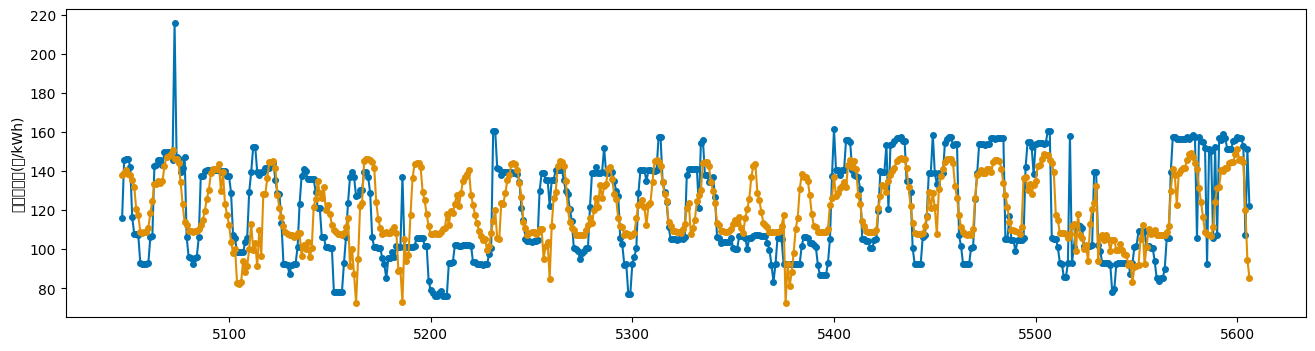

In [16]:
plt.figure(figsize=(40, 10))
plot_series(
    y_valid, pd.Series(pred), markers=[ 'o', 'o'])
plt.show()